# Personal Loan Campaign

## Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

As a Data scientist at AllLife bank, I have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective
1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

## Data Information


**Data Dictionary**

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?


# NECESSARY CODING

### 1.0 Import necessary libraries

In [46]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
# To get diferent metric scores


# To tune different models
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### 1.1 Load the dataset
The dataset containing the different attributes of used cars sold in different locations is contained in the file titled "anime_data_raw.csv" in my particular directory.

In [47]:
# loading the dataset
my_dataset = pd.read_csv("Loan_Modelling.csv")


<IPython.core.display.Javascript object>

In [48]:
# copying data to another varaible to avoid any changes to original data
data = my_dataset.copy()

<IPython.core.display.Javascript object>

### 1.2 Check out the shape of the dataset

In [49]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset contains 5000 rows and 14 columns.


<IPython.core.display.Javascript object>

In [50]:
data.drop(["ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

# There are 3 steps in Data Preprocessing:

# STEP A :Data format checking:
- Data Dimensioning
- checking the Data types

### 1.3A Checking the length of the dataset ()

In [51]:
len(data)

5000

<IPython.core.display.Javascript object>

### 1.4A To view first 5 rows of the dataset

In [52]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

### 1.5A To view the last 5 rows of the dataset

In [53]:
data.tail()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

### 1.6A To view 10 samples of the dataset

In [54]:
# let's view a sample of the data
data.sample(
    10, random_state=2
)  # setting the random_state will ensure we get the same results every time

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3566,57,33,80,92064,2,2.8,1,0,0,0,0,1,1
4252,54,29,81,91107,1,0.1,3,0,0,0,0,0,0
1918,39,9,118,93555,2,6.0,3,246,1,0,1,1,1
4111,43,17,21,95351,3,1.5,1,0,0,0,0,0,0
1471,52,26,180,94305,1,1.0,1,0,0,0,0,1,1
929,55,30,22,92121,1,1.5,2,91,0,0,0,0,1
1916,57,32,64,95138,3,1.6,3,0,0,0,0,1,0
3995,53,28,34,92697,2,0.6,3,0,0,0,0,1,1
1130,58,32,191,94402,1,2.9,1,0,0,0,0,0,0
1723,39,15,55,95821,1,1.5,3,0,0,0,0,1,0


<IPython.core.display.Javascript object>

### 1.7A checking the names of the columns in the data

In [55]:
print(data.columns)

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


<IPython.core.display.Javascript object>

### 1.8A checking column datatypes and number of non-null values

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


<IPython.core.display.Javascript object>

#### Observations
1. One column is of **float** type.
2. Twelve(12) columns are of **int** type 
3. Dependent variable is Personal_Loan. It is of **Int** type.


# STEP B IN DATA PROCESSING-------Data Consistency:
- Checking for missing values.
- Checking for inconsistency.
- Checking for duplicate values.
- Checking for outliers.
- Checking data distribution and skewness

### 1.10B checking if the dataset has duplicate values


In [57]:
data[data.duplicated()].count()


Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
1. There are no duplicate values in the dataset

### 1.11B checking for missing values in the data.

In [58]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
* There are no missing values in the data.

### 1.12B Statistical Summary or Descriptive Statistics

In [59]:
data.describe(include="all").T  # quick summary of numeric features

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

#### Observations.
1. The table above shows that the **Age** range of the customers varies from 23 to 67.
2. The table above shows that the **Family** sizes of the customers varies from 1 to 4.
3. The minimum level of **Education** of the customers is 1(Undergrad), while the maximum level of Education is
    3( Advanced/Professional).
  
4. The maximum years of professional **experience** of the customers is 43 
5. The dependent variable, **Personal_Loan** is either **0** representing that the customer did not accept the personal loan offered in the last campaign, or **1** representing that the customer accepted the personal loan offered in the last campaign.

### 1.15B filtering non-numeric columns

In [60]:
cat_columns = data.select_dtypes(exclude=np.number).columns
cat_columns

Index([], dtype='object')

<IPython.core.display.Javascript object>

#### Observation:
1. The dataset does not have any **[string]** datatype

In [61]:
# we will skip the Age, Experience, CCAvg, Mortgage, Income, and ZIP Code columns because they will have a lot of unique values

cat_col = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "Family",
    "CreditCard",
]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

1    2096
3    1501
2    1403
Name: Education, dtype: int64
--------------------------------------------------
0    4520
1     480
Name: Personal_Loan, dtype: int64
--------------------------------------------------
0    4478
1     522
Name: Securities_Account, dtype: int64
--------------------------------------------------
0    4698
1     302
Name: CD_Account, dtype: int64
--------------------------------------------------
1    2984
0    2016
Name: Online, dtype: int64
--------------------------------------------------
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
--------------------------------------------------
0    3530
1    1470
Name: CreditCard, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

#### Observations.
1.  Most of the customers have Education level as 1( Undergrad).
2. Most of the customers did not accept the loan offered in the last campaign.
3. Most of the customers do not have securities account with the bank.
4. Majority of the customers do not certificate of deposit (CD) account with the bank.
5. Higher percentage of the customers use internet banking facilities
5. Majority of the customers do not use a credit card issued by any other Bank (excluding All life Bank).

 # 1.16B Exploratory Data Analysis

#### UNIVARIANT ANALYSIS For the Numerical Variables

In [62]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Age

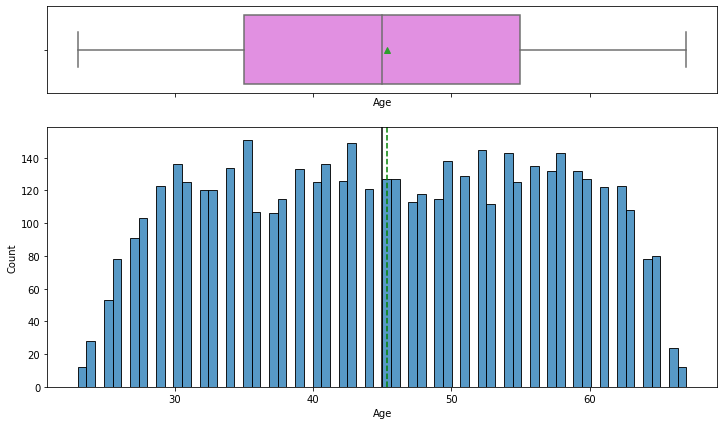

<IPython.core.display.Javascript object>

In [63]:
histogram_boxplot(data, "Age", bins=70)

#### Observation.
1. The Age is close to normally distributed with a median of 45.

### Outlier- Treatment
## [Age] ##

In [64]:
quartiles = np.quantile(data["Age"][data["Age"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_Age = data.loc[np.abs(data["Age"] - data["Age"].median()) > power_4iqr, "Age"]
outlier_Age

Q1 = 35.0, Q3 = 55.0, 4*IQR = 80.0


Series([], Name: Age, dtype: int64)

<IPython.core.display.Javascript object>

###  [Experience]

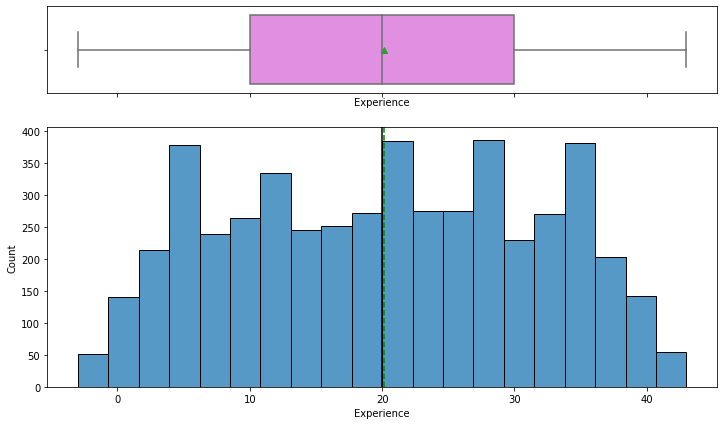

<IPython.core.display.Javascript object>

In [65]:
histogram_boxplot(data, "Experience")

#### Observation.
1. The years of professional **Experience** are close to normally distributed with a median of 20.

### Outlier- Treatment 
## [Experience] ## 

In [66]:
quartiles = np.quantile(data["Experience"][data["Experience"].notnull()], [0.25, 0.75])
Experience_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Experience_4iqr}")
outlier_Experience = data.loc[
    np.abs(data["Experience"] - data["Experience"].median()) > power_4iqr, "Experience"
]
outlier_Experience

Q1 = 10.0, Q3 = 30.0, 4*IQR = 80.0


Series([], Name: Experience, dtype: int64)

<IPython.core.display.Javascript object>

### [Income]

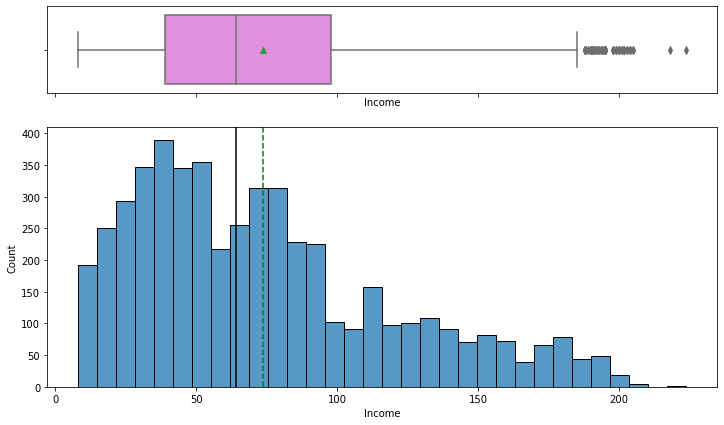

<IPython.core.display.Javascript object>

In [67]:
histogram_boxplot(data, "Income")

#### Observation.
1. The distribution is right-skewed with a median of 64k and an average below 75k.

### Outlier Treatment
## [Income]

In [68]:
quartiles = np.quantile(data["Income"][data["Income"].notnull()], [0.25, 0.75])
Income_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Income_4iqr}")
outlier_Income = data.loc[
    np.abs(data["Income"] - data["Income"].median()) > Income_4iqr, "Income"
]
outlier_Income

Q1 = 39.0, Q3 = 98.0, 4*IQR = 236.0


Series([], Name: Income, dtype: int64)

<IPython.core.display.Javascript object>

### [ZIPCode]

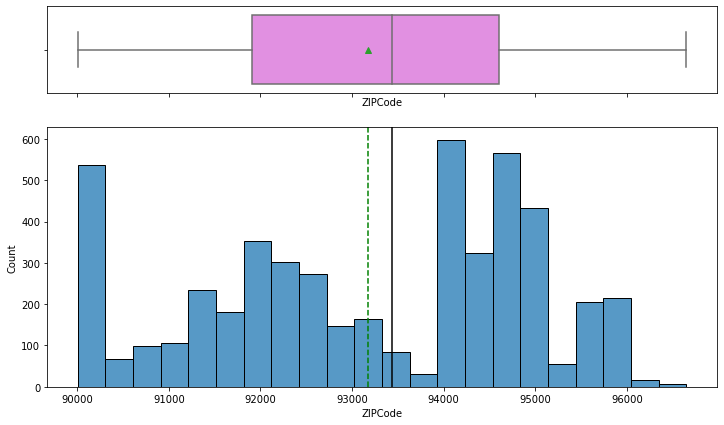

<IPython.core.display.Javascript object>

In [69]:
histogram_boxplot(data, "ZIPCode")

### Outlier- Treatment
## [ZIPCode]


In [70]:
quartiles = np.quantile(data["ZIPCode"][data["ZIPCode"].notnull()], [0.25, 0.75])
ZIPCode_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {ZIPCode_4iqr}")
outlier_ZIPCode = data.loc[
    np.abs(data["ZIPCode"] - data["ZIPCode"].median()) > ZIPCode_4iqr, "ZIPCode"
]
outlier_ZIPCode

Q1 = 91911.0, Q3 = 94608.0, 4*IQR = 10788.0


Series([], Name: ZIPCode, dtype: int64)

<IPython.core.display.Javascript object>

### [CCAvg]

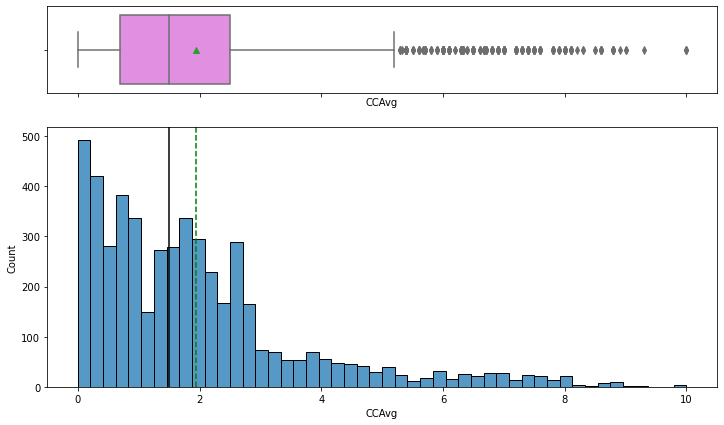

<IPython.core.display.Javascript object>

In [71]:
histogram_boxplot(data, "CCAvg")

#### Observation.
1. The distribution is right-skewed, and Average spending on credit cards per month (in thousand dollars) is below 2. The median value is 1.5

### Outlier - Treatment
## [CCAvg]

In [72]:
quartiles = np.quantile(data["CCAvg"][data["CCAvg"].notnull()], [0.25, 0.75])
CCAvg_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {CCAvg_4iqr}")
outlier_CCAvg = data.loc[
    np.abs(data["CCAvg"] - data["CCAvg"].median()) > CCAvg_4iqr, "CCAvg"
]
outlier_CCAvg

Q1 = 0.7, Q3 = 2.5, 4*IQR = 7.2


9        8.9
787     10.0
881      8.8
917      8.8
1277     8.8
1339     9.0
2101    10.0
2337    10.0
2447     8.8
2769     8.8
2988     8.8
3312     8.8
3804     8.8
3822     9.0
3943     9.3
4225     8.8
Name: CCAvg, dtype: float64

<IPython.core.display.Javascript object>

#### Observation.
1. The distribution is heavily right-skewed

###  [Mortgage]

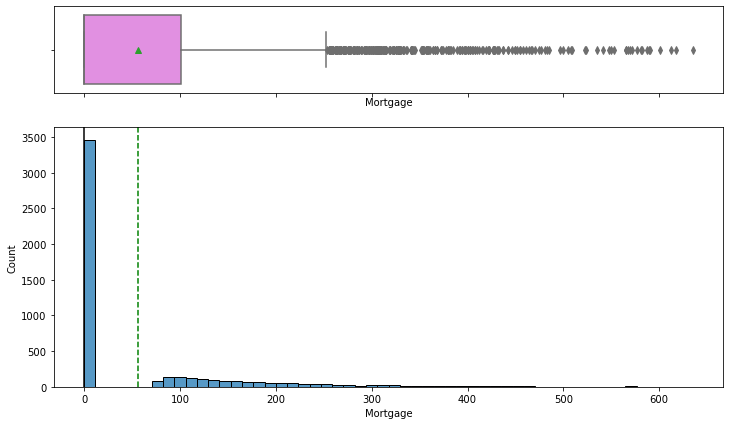

<IPython.core.display.Javascript object>

In [73]:
histogram_boxplot(data, "Mortgage")

### Outlier- Treatment 
## [Mortgage]

In [74]:
quartiles = np.quantile(data["Mortgage"][data["Mortgage"].notnull()], [0.25, 0.75])
Mortgage_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Mortgage_4iqr}")
outlier_Mortgage = data.loc[
    np.abs(data["Mortgage"] - data["Mortgage"].median()) > Mortgage_4iqr, "Mortgage"
]
outlier_Mortgage

Q1 = 0.0, Q3 = 101.0, 4*IQR = 404.0


42      412
59      455
303     617
354     419
365     466
459     458
473     547
479     470
570     485
684     449
782     587
952     524
1111    442
1167    475
1273    437
1277    428
1359    433
1372    483
1623    455
1674    421
1716    565
1783    601
1789    567
1937    589
2041    535
2217    446
2319    422
2382    428
2394    505
2443    422
2541    569
2653    408
2668    406
2687    452
2714    432
2753    477
2769    582
2812    467
2841    565
2934    635
2946    437
2956    522
2989    496
3012    415
3021    461
3357    408
3373    442
3411    427
3470    429
3472    431
3515    508
3571    416
3608    553
3662    500
3702    410
3776    449
3945    428
4016    427
4238    464
4240    509
4294    481
4345    577
4422    422
4541    405
4585    571
4655    581
4672    550
4812    612
4842    590
4859    541
Name: Mortgage, dtype: int64

<IPython.core.display.Javascript object>

## UNIVARIANT ANALYSIS For the Categorical Variables

In [75]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

## Family

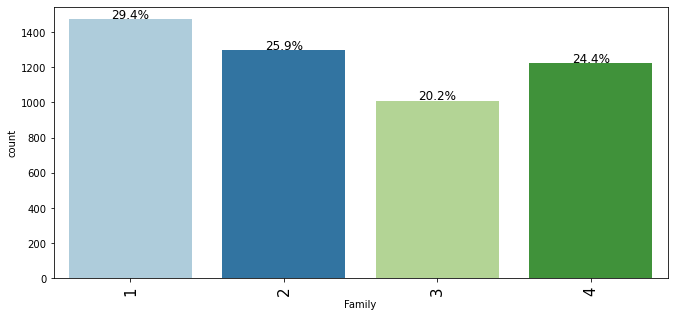

<IPython.core.display.Javascript object>

In [76]:
labeled_barplot(data, "Family", perc=True, n=10)

#### Observations.
1. The data contains 4 different Family sizes of the customer.
2. Most customers have a family size of 1.

## Education

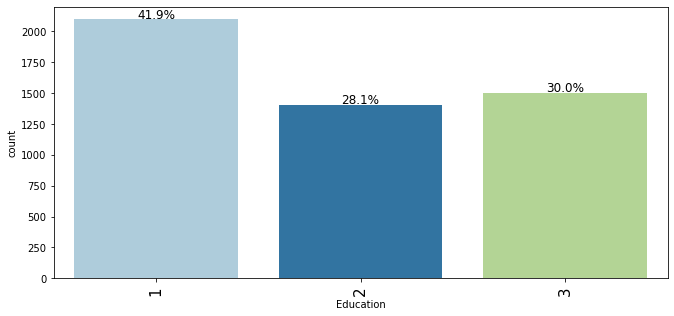

<IPython.core.display.Javascript object>

In [77]:
labeled_barplot(data, "Education", perc=True, n=10)

#### Observations.
1. The data contains 3 customer Education Levels. 1: Undergrad; 2: Graduate;3: Advanced/Professional
2. Majority of the customers only have an Undergrad degree.

## Personal Loan

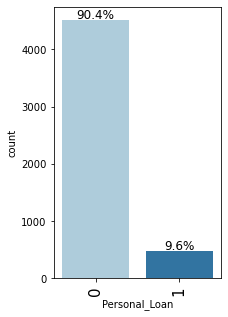

<IPython.core.display.Javascript object>

In [78]:
labeled_barplot(data, "Personal_Loan", perc=True)

#### Observations.
1. Majority (90.4%) of the customers Did not accept the personal loan offered in the last campaign

## Securities_Account

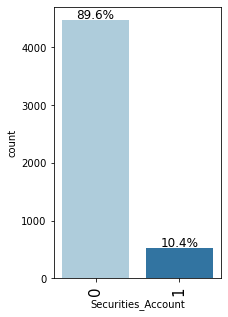

<IPython.core.display.Javascript object>

In [79]:
labeled_barplot(data, "Securities_Account", perc=True)

#### Observations.
1. 89.6% of the customers do not have securities account with the bank.

## CD_Account

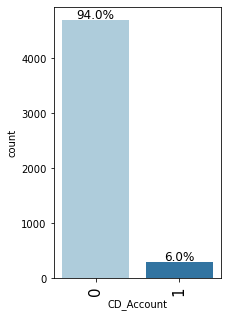

<IPython.core.display.Javascript object>

In [80]:
labeled_barplot(data, "CD_Account", perc=True)

#### Observations
1. 94% of the customers do not have a certificate of deposit (CD) account with the bank

## Online

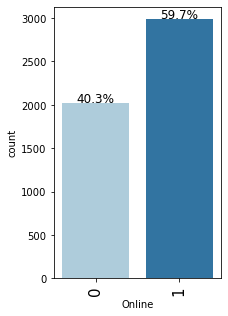

<IPython.core.display.Javascript object>

In [81]:
labeled_barplot(data, "Online", perc=True)


#### Observations.
1. Majority (59.7%) of the customers use internet banking facilities

## CreditCard

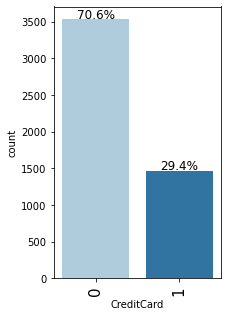

<IPython.core.display.Javascript object>

In [82]:
labeled_barplot(data, "CreditCard", perc=True)

#### Observations.
1. Majority (70.6%) of the customers do not use a credit card issued by any other Bank (excluding All life Bank).

#### Observations.
1. Most of the cars are **First** owned.

# 1.17B Bivariate Analysis.

Through bivariate analysis we try to analyze two variables simultaneously. I will try to determine if there is any relationship between two variables from the dataset.

For this type of analysis, we can use use:
1. Pairplot.
2. Heatmap function in seaborn.
3. Pointplot.
3. Barplot or
4. Scatter plot.

Exploring the Relationship between numerical variables using **pair plots** and **correlation plots**.

In [ ]:
sns.pairplot(data=data, hue="Personal_Loan")
plt.show()

In [ ]:
correlation = data.corr()  # creating a 2-D Matrix with correlation plots
correlation

## plotting a Heatmap

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations.
1. The **Age** and the years of professional **Experience** of the customers are highly correlated. 0.99 correlation.
2. The **CCAvg**  and the **Income** of the customers are slightly highly(positive) correlated. 0.65 is the correlation.
3. The **Personal_Loan**  and the **CCAvg** of the customers have low correlation. 0.37 is the correlation.  
4. The **Personal_Loan**  and the **Income** of the customers are correlated. 0.5 is the correlation.  
4. Further investigation would be needed on this Dataset.


### Exploring the categorical features

I will check the relationship betwwen the **Target** variable with some of the **categorical** columns in my data

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
stacked_barplot(data, "Education", "Personal_Loan")

#### Observations
The Education Levels of the customers are 
1: Undergrad; 2: Graduate;3: Advanced/Professional
 1. The figure above shows that across all level of education, the number of customer that did not accept the personal loan offered in the last campaign is higher than those that accepted the Loan offer.
 
 2. The data also shows that for customers with higher education level, the number of those that accepted the Loan increased.

In [ ]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

#### Observations

There are two(2) groups of customers:
1. The customers that do not have securities account with the bank. 
2. The customers that have securities account with the bank. 
3. In both groups, the % of customers that did not accept the **[Personal_Loan]** is greater than those that accepted the loan.

In [ ]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

#### Observations

There are two(2) groups of customers:
1. The customers that have a certificate of deposit (CD) account with the bank. 
2. The customers that do not have a certificate of deposit (CD) account with the bank. 
3. In both groups, the % of customers that did not accept the **[Personal_Loan]** is greater than those that accepted the loan.
4. Furthermore, the % of customers that did not accept the **[Personal_Loan]** is greater in the group that do not have a **[CD_Account]**.

In [ ]:
stacked_barplot(data, "Online", "Personal_Loan")


#### Observations

There are two(2) groups of customers:
1. The customers that use internet banking facilities 
2. The customers that do not use internet banking facilities 
3. In both groups, the % of customers that did not accept the **[Personal_Loan]** is greater than those that accepted the loan.


In [ ]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

#### Observations

There are two(2) groups of customers:
1. The customers that use a credit card issued by any other Bank (excluding All life Bank)?
2. The customers that do not use a credit card issued by any other Bank (excluding All life Bank)?
3. In both groups, the % of customers that did not accept the **[Personal_Loan]** is greater than those that accepted the loan.


In [ ]:
stacked_barplot(data, "Family", "Personal_Loan")

#### Observations

the Family size of the customers are either 1, 2 3 or 4.

1. In both groups, the % of customers that did not accept the **[Personal_Loan]** is greater than those that accepted the loan.
2. Family size influences the possibility of accepting the **[Personal_Loan]**. 
3. Higher % of the Customers with higher family size accepted the **[Personal_Loan]**. 

####  Personal_Loan vs Age, Experience, Income, ZIPCode, CCAvg and Mortgage
       

In [ ]:
cols = data[
    [
        "Age",
        "Experience",
        "Income",
        "ZIPCode",
        "CCAvg",
        "Mortgage",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Personal_Loan"], data[variable], palette="gnuplot2_r")
    plt.tight_layout()
    plt.title(variable)
plt.show()

**It is difficult to make an interpretation from the graphs above let's visualize them by removing these outliers (for visualization not from orignal data) to get a better understanding**

In [ ]:
cols = data[
    [
        "Age",
        "Experience",
        "Income",
        "ZIPCode",
        "CCAvg",
        "Mortgage",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(
        data["Personal_Loan"], data[variable], palette="gnuplot2_r", showfliers=False
    )
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Customer-Level Analysis

In [ ]:
plt.figure(figsize=(30, 15))
sns.boxplot(
    data["Experience"],
    data["Age"],
    hue=data["Personal_Loan"],
    palette="gnuplot2_r",
    showfliers=False,
)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Observations

1. As the years of professional **[experience]** of the customers, the **[Age]** also increases. Hence, older customers are likely to have more years of years of professional experience.
2. Some customers within the ranges of **[2 -40]** of professional experience accepted the Personal_Loan.
3. Customers with no level of experience did not accept the Personal_Loan. Probably because they had less need for it. 


In [ ]:
plt.figure(figsize=(30, 15))
sns.boxplot(
    data["CCAvg"],
    data["Income"],
    hue=data["Personal_Loan"],
    palette="gnuplot2_r",
    showfliers=False,
)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Observations

1. Average spending on credit cards per month (in thousand dollars) increased as the **[Income]** of the customer increased. This condition applies to those customers that did not accept the **[Personal_Loan]** offer. Hence, it seems that these group of customers had the freedom to spend more simply because, they do not have to worry about repaying a **[Personal_Loan]**.

2. Average spending on credit cards per month (in thousand dollars) was a bit steady as the **[Income]** of the customer increased. This condition applies to those customers that accepted the **[Personal_Loan]** offer. Hence, it seems that for these group of customers, there was less need to spend from a **[Credit -Card]** simply because, they accepted a **[Personal_Loan]**.

In [ ]:
#### plt.figure(figsize=(30, 15))
sns.boxplot(
    data["Experience"],
    data["Income"],
    hue=data["Personal_Loan"],
    palette="gnuplot2_r",
    showfliers=False,
)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Observations.
1. Customers with high Annual income (in thousand dollars) accepted the **[Personal_Loan]**. These group of customers had years of professional **[experience]** ranging from 1-41.
2. Customers with low Annual income below 100 (in thousand dollars) did not accepted the [Personal_Loan]. These group of customers had years of professional [experience] ranging from below 1 to 43.

In [ ]:
plt.figure(figsize=(30, 15))
sns.boxplot(
    data["Experience"],
    data["CCAvg"],
    hue=data["Personal_Loan"],
    palette="gnuplot2_r",
    showfliers=False,
)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Observations
1. Most Customers with Average spending on credit cards above 2 (in thousand dollars) per month, accepted the [Personal_Loan]. These group of customers had years of professional [experience] ranging from 1-41.
2. Most Customers with Average spending on credit cards below 2 (in thousand dollars) per month, did not accepted the [Personal_Loan].  These group of customers had years of professional [experience] ranging from below 1 to 43.

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

# 1.18 STEP C-
### Data Preprocessing ***continues*** here- FEATURE ENGINEERING

#### Transformation of Variables

In [ ]:
# list of numerical columns
dist_cols = [
    item for item in data.select_dtypes(include=np.number).columns if "tag" not in item
]

#  plotting a histogram of all Numerical columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(data[dist_cols[i]], bins=50)
    # sns.histplot(data=df3, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

#### Observations.
1. The [**Age]** and **[Experience]** features are uniformly distributed.
2. Some are close to normal distribution.
3. **[Income] and **[CCAvg]** are skewed to the right.

In [ ]:
n_true = len(data.loc[data["Personal_Loan"] == True])
n_false = len(data.loc[data["Personal_Loan"] == False])
print(
    "Number of true cases: {0} ({1:2.2f}%)".format(
        n_true, (n_true / (n_true + n_false)) * 100
    )
)
print(
    "Number of false cases: {0} ({1:2.2f}%)".format(
        n_false, (n_false / (n_true + n_false)) * 100
    )
)

### Creating a copy of the dataframe.

In [ ]:
df1 = data.copy()



### Creating dummy variables

In [ ]:
# creating dummy varibles
dummy_data = pd.get_dummies(
    df1,
    columns=data.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

dummy_data.head()

In [ ]:
X = dummy_data.drop("Personal_Loan", axis=1)  # Features
y = dummy_data["Personal_Loan"].astype("int64")  # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

## 1.19 Spliting the data 
We will use 70% of data for training and 30% for testing.

In [ ]:
from sklearn.model_selection import train_test_split


# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

### Model evaluation criterion

### Model can make wrong predictions

# 1.20 Model building - Logistic Regression

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [ ]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### 1.21 Logistic Regression

In [ ]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

### Finding the coefficients

In [ ]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

### Coefficient interpretations

* Coefficient of **[Age]**, **[Securities_Account], **[Online]** and **[Credit card]** are negative, increase in these will lead to decrease in chances of a customer accepting the **[Personal_Loan]**.

* The other Features have positive coefficient. Increase in these will lead to increase in chances of a customer accepting the **[Personal_Loan]**.

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

**Odds from coefficients**

In [ ]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

#### Checking model performance on training set

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

#### Checking model performance on test set

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

#### ROC-AUC on training set

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

In [ ]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Model is giving a generalized performance.

### Model Performance Improvement

Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

#### Checking model performance on training set

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_train, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

#### Checking model performance on test set

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_test, y_test, threshold=optimal_threshold_auc_roc
    )
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

* The precision of the model for both training and test set has improved but the F1 score has reduced.

#### Let's use Precision-Recall curve and see if we can find a better threshold

In [ ]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.32, we get balanced recall and precision.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.32

#### Checking model performance on training set

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [ ]:
log_reg_model_train_perf_threshold_curve = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_train, y_train, threshold=optimal_threshold_curve
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

#### Checking model performance on test set

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [ ]:
log_reg_model_test_perf_threshold_curve = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_test, y_test, threshold=optimal_threshold_curve
    )
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

* Model is performing well on training and test.


# Model performance evaluation

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression- 0.0947 Threshold",
    "Logistic Regression-0.32 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression- 0.0947 Threshold",
    "Logistic Regression-0.32 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

### Conclusion
- I have been able to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan with an f1_score of 0.677 On the training set.


- Coefficient of **[Age]**, **[Securities_Account], **[Online]** and **[Credit card]** are negative, increase in these will lead to decrease in chances of a customer accepting the **[Personal_Loan]**.

* The other Features have positive coefficient. Increase in these will lead to increase in chances of a customer accepting the **[Personal_Loan]**.

# 1.21 Model building - Decision Tree

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.
If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

class_weight is a hyperparameter for the decision tree classifier.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
# Checking number of positives
y.sum(axis=0)

### Checking model performance on training set

In [ ]:
print("Accuracy on training set : ", model.score(X_train, y_train))
print("Accuracy on test set : ", model.score(X_test, y_test))

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable

    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [ ]:
# Confusion matrix
from sklearn import metrics

make_confusion_matrix(model, y_test)

In [ ]:
# Recall Score of training dataset
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

In [ ]:
# Recall Score of testing dataset
decision_tree_perf_test = get_recall_score(model, X_test, y_test)

print("Recall Score:", decision_tree_perf_test)

In [ ]:
# List of all Column features
feature_names = list(X.columns)
print(feature_names)

In [ ]:
# plotting the decision tree
plt.figure(figsize=(20, 30))
tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

In [ ]:
# Showing the features in decreasing order of importance
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

According to the decision tree model, Income is the most important variable for  that can be used to identify the potential customers who have a higher probability of purchasing the loan.

# 1.22 Reducing over fitting

### Using GridSearch for Hyperparameter tuning of our tree model

Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
It is an exhaustive search that is performed on a the specific parameter values of a model.
The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Checking performance on training set

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)



In [ ]:
# Recall Score of training dataset
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

### Checking performance on testing set

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
# Recall Score of testing dataset
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

## Visualizing the Decision Tree

In [ ]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

1. In tuned decision tree Income is the most important feature followed by CCAvg.

2. There are the top two important features that can be used to identify the potential customers who have a higher probability of purchasing the loan.

## Cost Complexity Pruning

The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

### Total impurity of leaves vs effective alphas of pruned tree

Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


Maximum value of Recall is at 0.014 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.002 retaining information and getting higher recall.

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

In [ ]:
best_model.fit(X_train, y_train)

# checking performance on training set

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
# Recall Score of training dataset
get_recall_score(best_model, X_train, y_train)



# checking performance on test set

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
# Recall Score of test dataset
get_recall_score(best_model, X_test, y_test)


# Visualizing the Decision Tree

In [ ]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

# Checking performance on the training set

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_postpruned_perf_train = get_recall_score(best_model, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

This model might be giving the highest recall but a buisness would not be able to use it to actually target the potential customers.

Creating model with 0.002 ccp_alpha

In [ ]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

## Checking performance on the test set

In [ ]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [ ]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)


The results have improved from the initial model.
The performance is comparable to the hyperparameter tuned model.
The model is giving a generalized performance on training and test set.

## Visualizing the Decision Tree

In [ ]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

In [ ]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Income and Family duration are the top two important features that can be used to identify the potential customers who have a higher probability of purchasing the loan.

# Comparing all the decision tree models

In [ ]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

In [512]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.885906
1,0.865772
2,0.906040


<IPython.core.display.Javascript object>

Decision tree model with pre-pruning has given the best recall score on training data.
The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

# Conclusions

1. I analyzed the "**[Loan_Modelling dataset]** using different techniques such as:

- Logistic regression
- Decision Tree classifier. 
I used these methods to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

I visualized different trees and their respective confusion matrix inorder to get a better understanding of the model.

I used the Decision Trees to identify important features that will help to dentify the potential customers who have a higher probability of purchasing the loan.

The Decision tree revealed that the following features are the most important variable in identify the potential customers who have a higher probability of purchasing the loan.
1. Income: Annual income of the customer (in thousand dollars)
2. Family: the Family size of the customer
3. EDUCATION level of the customer.
4. CCAvg: Average spending on credit cards per month (in thousand dollars)
I used hyper-parameters/ pruning to reduce overfitting.

# Recommendations
According to the decision tree model -

1. If Annual income of the customer (in thousand dollars) > 152.987, there is a high chance that the customer will not purchase the loan.

2. If Annual income of the customer (in thousand dollars) less than 152.987 and the average spending on credit cards per month (in thousand dollars) is more than 2.918, then there is a very high chance that the customer will not purchase the loan.

3. The data also reveals that for customers with higher education level, the number of those that accepted the Loan increased. Hence, AllLife Bank should know that these group of people are potential customers. They have a higher possibility of accepting the **[Personal_Loan]** offer.
 
4. Average spending on credit cards per month (in thousand dollars) was a bit steady as the **[Income]** of the customer increased. This condition applies to those customers that accepted the **[Personal_Loan]** offer. Hence, it seems that for these group of customers, there was less need to spend from a **[Credit -Card]** simply because, they accepted a **[Personal_Loan]**. AllLife Bank should know that these group of people are potential customers. They have a higher possibility of accepting the **[Personal_Loan]** offer.


5. Family size influences the possibility of accepting the **[Personal_Loan]**. Higher % of the Customers with higher family size accepted the **[Personal_Loan]**. Therefore, AllLife Bank should know that these group of people are potential customers. They have a higher possibility of accepting the **[Personal_Loan]** offer. 

6. Average spending on credit cards per month (in thousand dollars) was a bit steady as the **[Income]** of the customer increased. This condition applies to those customers that accepted the **[Personal_Loan]** offer. Hence, it seems that for these group of customers, there was less need to spend from a **[Credit -Card]** simply because, they accepted a **[Personal_Loan]**. AllLife Bank should know that these group of people are potential customers. They have a higher possibility of accepting the **[Personal_Loan]** offer.

In summary, the potential customers for AllLife Bank are:
1. Customers with higher **[Family]** size.
2. Customers with higher **[Education]** level.
3. Customers with higher **[Family]** size.
4. Customers with higher annual **[income (in thousand dollars)]** above 100.



